In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\2-Time series project\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.to_csv(r'C:\Users\Mica\Desktop\all_data.csv')

In [7]:
all_data.shape

(4752, 7)

In [10]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [9]:
all_data['date'] = pd.to_datetime(all_data['date']) # Date era un object y no se representaba bien en los graficos. Lo cambie a datetime

In [4]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
tech_list = all_data['Name'].unique()

## Evolución del precio de cierre de las acciones de Google, Apple, Amazon y Microsoft

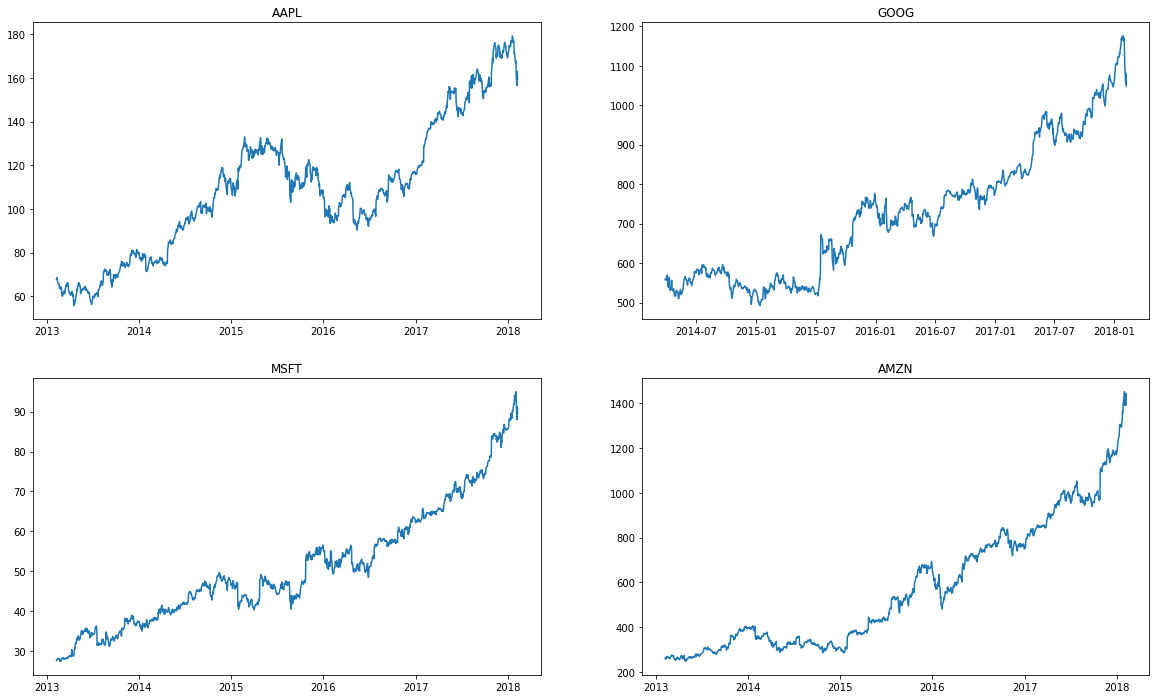

In [11]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list, 1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'], df['close'])
    plt.xticks()
    plt.title(company)

## Gráfico de intervalo de precio

In [12]:
import plotly.express as px

In [15]:
for company in tech_list:
        df = all_data[all_data['Name']==company]
        fig = px.line(df, x='date', y='volume', title=company)
        fig.show()

In [18]:
apple_data = pd.read_csv(r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\2-Time series project\individual_stocks_5yr\AAPL_data.csv')
apple_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


## Representación de la variación diaria

In [22]:
apple_data['Daily_change'] = apple_data['close'] - apple_data['open']
apple_data['Daily_change_%'] = (apple_data['close'] - apple_data['open']) / apple_data['close'] * 100

apple_data.head()

,date,open,high,low,close,volume,Name,Daily_change,Daily_change_%
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [25]:
fig = px.line(apple_data, x='date', y='Daily_change_%', title='Apple')
fig.show()

In [26]:
apple_df = apple_data.copy()

In [29]:
apple_df.dtypes

date               object
open              float64
high              float64
low               float64
close             float64
volume              int64
Name               object
Daily_change      float64
Daily_change_%    float64
dtype: object

In [32]:
apple_df['date'] = pd.to_datetime(apple_df['date'])
apple_df.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
Name                      object
Daily_change             float64
Daily_change_%           float64
dtype: object

In [33]:
apple_df.set_index('date', inplace=True) # Cambio el index a la fecha para buscar mejor entre dias

## Gráfico con el cambio en la media mensual del precio de las acciones de Apple

<AxesSubplot:xlabel='date'>

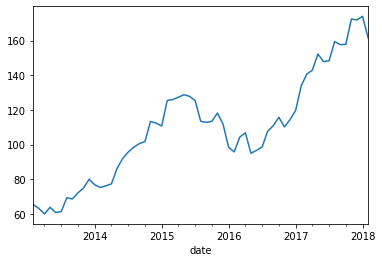

In [36]:
apple_df['close'].resample('M').mean().plot() # Calculo la media mensual del precio de cierre

## Gráfico con el cambio en la media anual del precio de las acciones de Apple

<AxesSubplot:xlabel='date'>

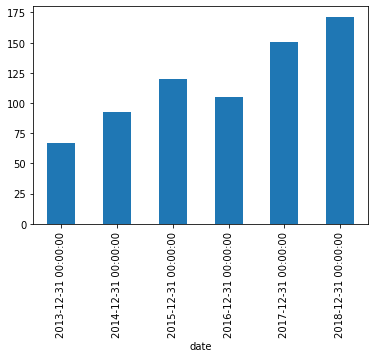

In [38]:
apple_df['close'].resample('Y').mean().plot(kind='bar')

## Correlación entre la variación en precio de las acciones de GOOG, AMZN, MSFT y AAPL

In [42]:
apple = pd.read_csv(r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\2-Time series project\individual_stocks_5yr\AAPL_data.csv')
microsoft = pd.read_csv(r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\2-Time series project\individual_stocks_5yr\MSFT_data.csv')
amazon = pd.read_csv(r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\2-Time series project\individual_stocks_5yr\AMZN_data.csv')
google = pd.read_csv(r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\2-Time series project\individual_stocks_5yr\GOOG_data.csv')


In [44]:
close = pd.DataFrame()
close['apple'] = apple['close']
close['microsoft'] = microsoft['close']
close['amazon'] = amazon['close']
close['google'] = google['close']

In [46]:
close.head()

,apple,microsoft,amazon,google
0,67.8542,27.55,261.95,558.46
1,68.5614,27.86,257.21,559.99
2,66.8428,27.88,258.70,556.97
3,66.7156,28.03,269.47,567.16
4,66.6556,28.04,269.24,567.00


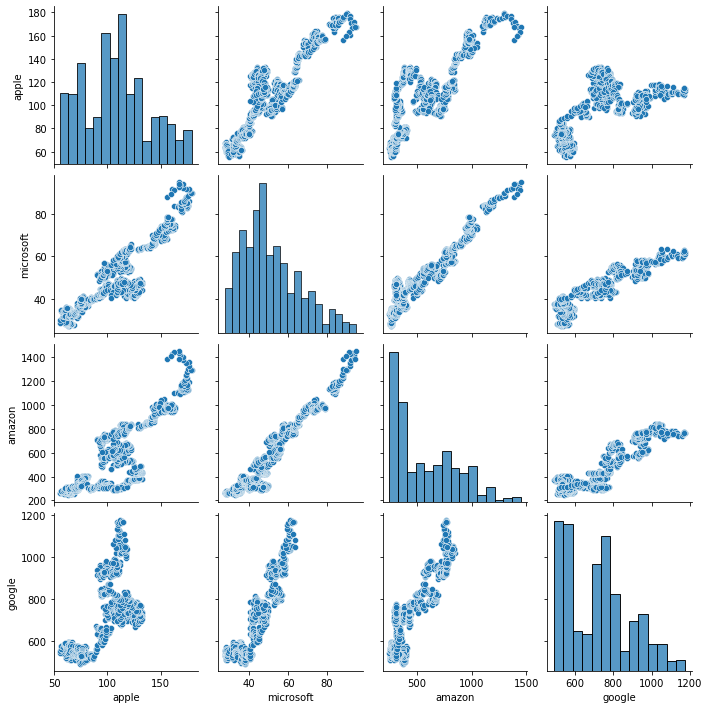

In [52]:
sns.pairplot(data=close)

<AxesSubplot:>

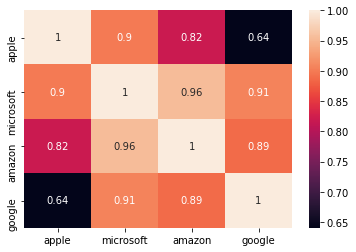

In [55]:
sns.heatmap(close.corr(), annot=True)

## Correlación entre el daily_change en precio de las acciones de GOOG, AMZN, MSFT y AAPL

In [56]:
data = pd.DataFrame()

data['apple_change'] = ((apple['close'] - apple['open']) / apple['close']) * 100
data['amazon_change'] = ((amazon['close'] - amazon['open']) / amazon['close']) * 100
data['microsoft_change'] = ((microsoft['close'] - microsoft['open']) / microsoft['close']) * 100
data['google_change'] = ((google['close'] - google['open']) / google['close']) * 100

In [58]:
data.head()

,apple_change,amazon_change,microsoft_change,google_change
0,0.206325,0.209964,0.725953,-1.708269
1,0.714688,-2.328836,0.753769,-0.216075
2,-2.481344,-0.189409,0.000000,-1.781065
3,-0.042869,2.946525,0.356761,1.489879
4,0.443624,0.694548,0.427960,0.334039


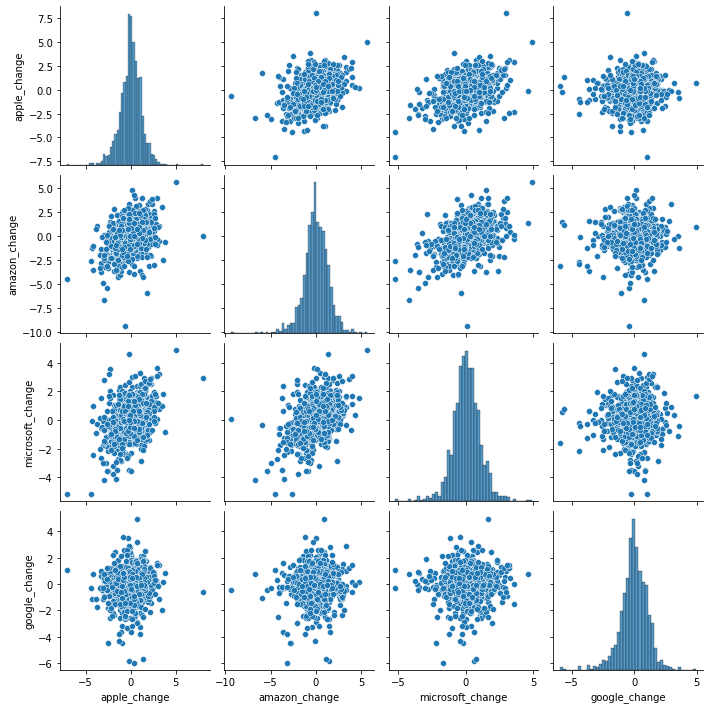

In [61]:
sns.pairplot(data=data)

<AxesSubplot:>

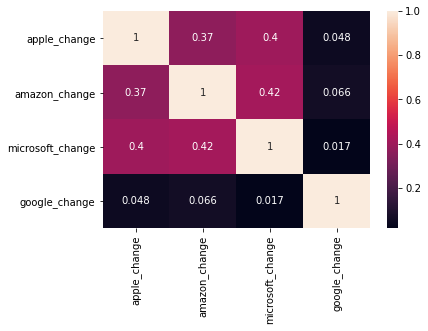

In [64]:
sns.heatmap(data.corr(), annot=True)

In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amazon_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
microsoft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
google_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
